# Vamshikrishna_Narmula_DSFT8_MINI_PROJECT-2 (CLASSIFICATION)

In [1]:
import numpy as np  #mathematical operations
import pandas as pd  #To operate the dataframes
import matplotlib.pyplot as plt   #To visualize
import seaborn as sb  #To visualize
from sklearn.preprocessing import LabelEncoder   #to converting the categorical columns to numeric
from sklearn.preprocessing import StandardScaler, MinMaxScaler   #for scaling the data
from sklearn.model_selection import train_test_split   #for splitting the data
#algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB

#importing libraries to find accuracy,precision,f1,recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading and reading the data
df = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [3]:
#structure
df.shape

(3000, 14)

In [4]:
df.drop(['Id'],axis=1,inplace=True)

In [5]:
# Copying the main data to another dataset
df1 = df.copy()

In [6]:
#structure after copying to another dataframe
df1.shape

(3000, 13)

        * After dropping the 'Id' feature we have 13 features and target feature is 'Grade'.

In [7]:
#datatypes
df1.dtypes

Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [8]:
#summary
df1.describe()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [9]:
#info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area(total)     3000 non-null   int64 
 1   Trooms          3000 non-null   int64 
 2   Nbedrooms       3000 non-null   int64 
 3   Nbwashrooms     3000 non-null   int64 
 4   Twashrooms      3000 non-null   int64 
 5   roof            3000 non-null   object
 6   Roof(Area)      3000 non-null   int64 
 7   Lawn(Area)      3000 non-null   int64 
 8   Nfloors         3000 non-null   int64 
 9   API             3000 non-null   int64 
 10  ANB             3000 non-null   int64 
 11  Expected price  3000 non-null   int64 
 12  Grade           3000 non-null   object
dtypes: int64(11), object(2)
memory usage: 304.8+ KB


In [10]:
#check for null values
df1.isnull().sum()

Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

        * No null values found in the given dataset

In [11]:
#check for special characters

for i in df1:
    v = df[i].value_counts()
    print(v)

344    55
308    54
349    54
292    53
360    52
       ..
297    33
358    32
294    32
336    32
352    31
Name: Area(total), Length: 71, dtype: int64
9    641
6    634
7    586
5    574
8    565
Name: Trooms, dtype: int64
4    623
5    600
6    573
3    410
7    393
8    226
2    175
Name: Nbedrooms, dtype: int64
4    590
5    584
3    550
6    475
7    310
2    288
8    116
1     87
Name: Nbwashrooms, dtype: int64
5     585
6     580
7     532
4     407
8     398
9     208
3     183
10     57
2      50
Name: Twashrooms, dtype: int64
YES    1543
NO     1457
Name: roof, dtype: int64
0      1457
116      42
87       40
96       39
82       39
90       36
104      36
79       36
77       36
93       36
118      35
98       35
70       34
88       34
97       34
106      34
110      34
101      34
74       34
115      34
91       33
117      32
102      32
108      31
75       30
103      30
100      30
84       30
95       29
76       29
99       29
78       29
89       28
119      28

        * No special characters found in the given dataset

# Data Visualization (EDA)

## Univariate Analysis

In [12]:
cols = ['Area(total)','Trooms','Nbedrooms','Twashrooms','Roof(Area)','Lawn(Area)',
        'Nfloors','API','ANB','Expected price']

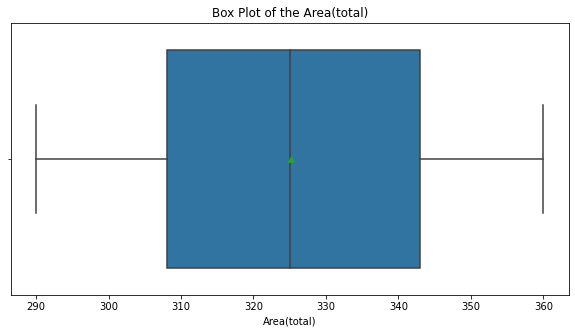

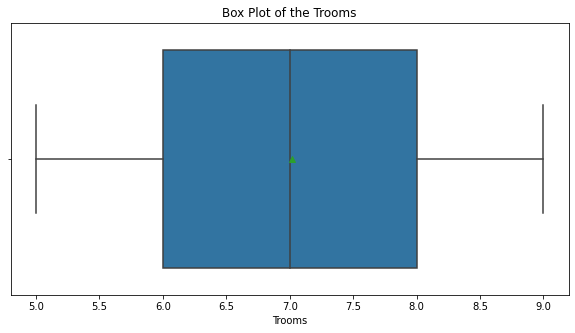

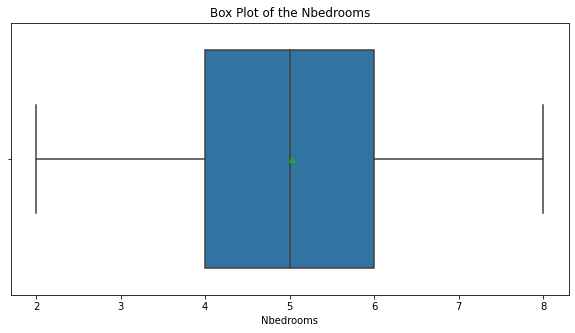

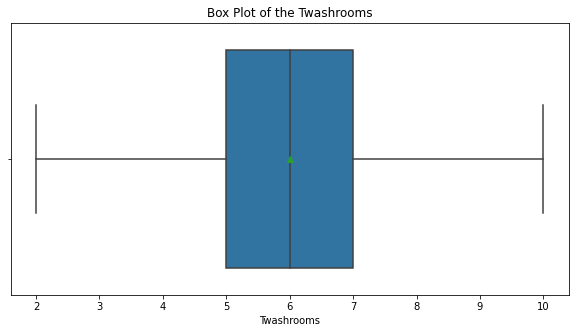

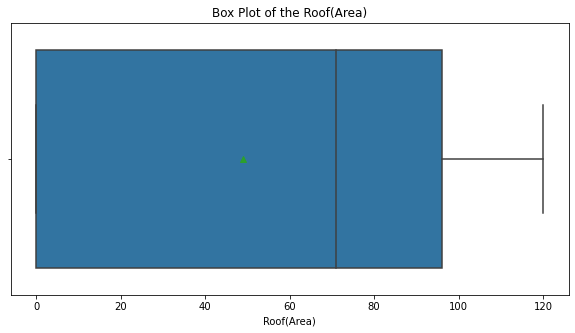

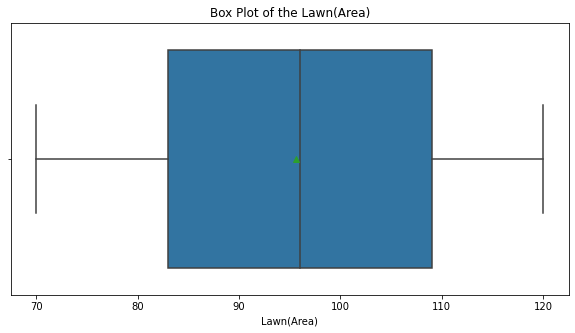

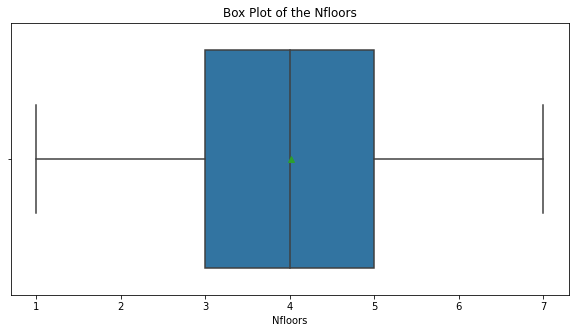

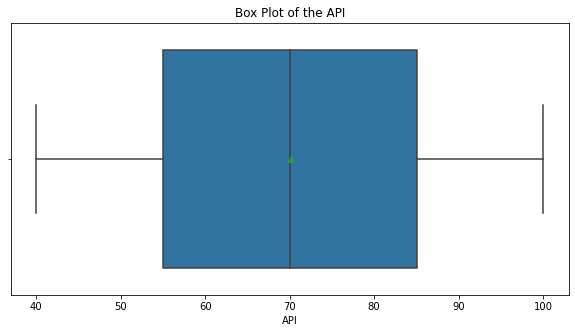

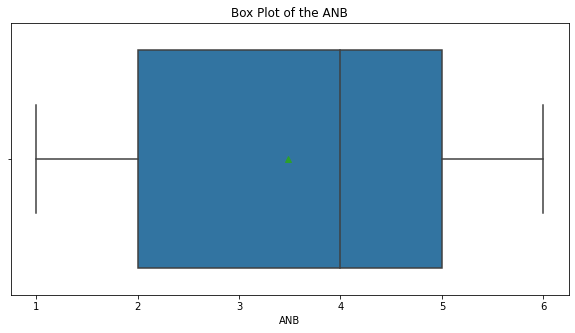

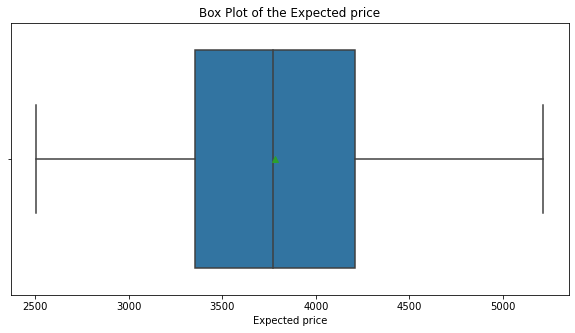

In [13]:
for i in cols:
    plt.figure(figsize=(10,5))
    sb.boxplot(i,data=df1,showmeans=True)
    plt.title(f'Box Plot of the {i}')
    plt.show()

       * From the boxplots we can see there are no outliers in the numeric features.

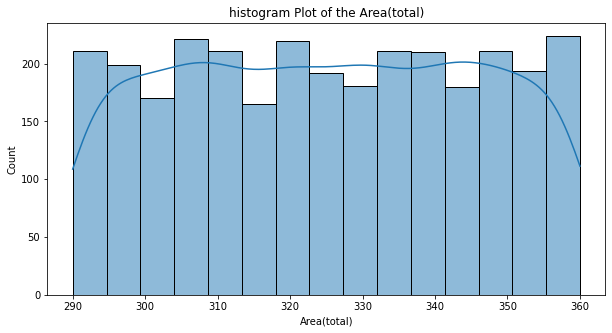

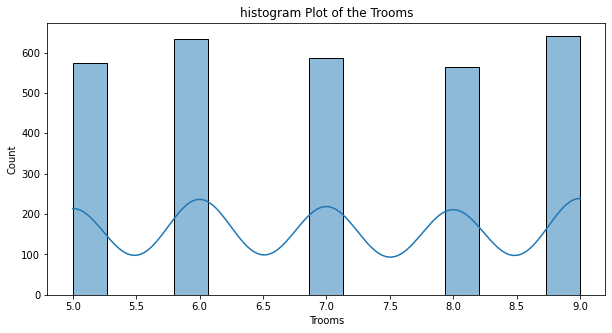

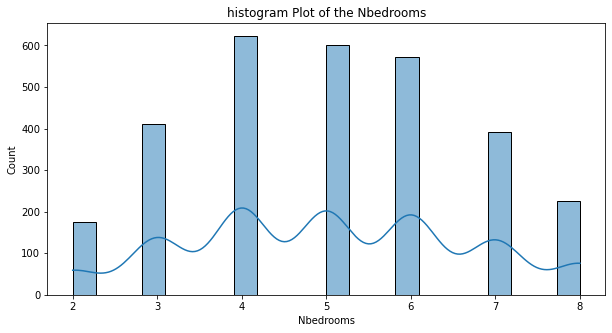

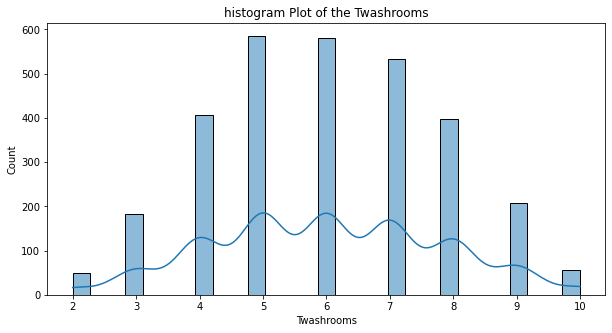

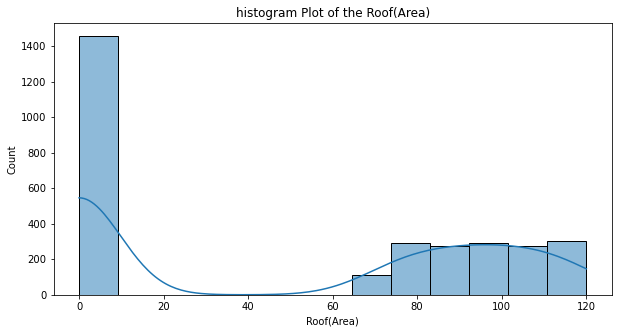

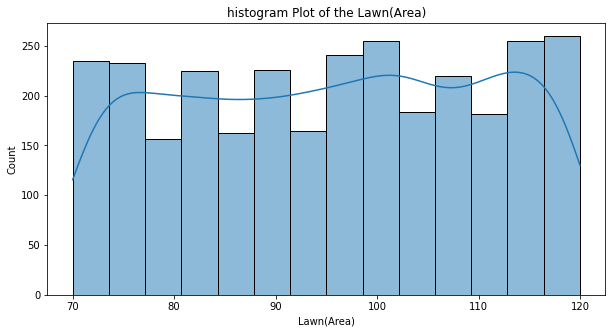

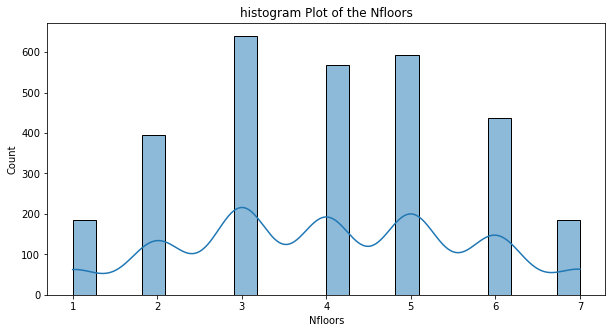

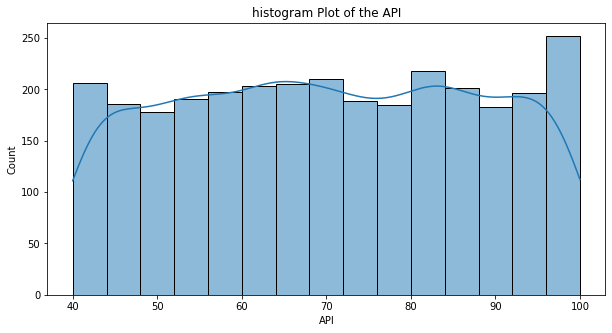

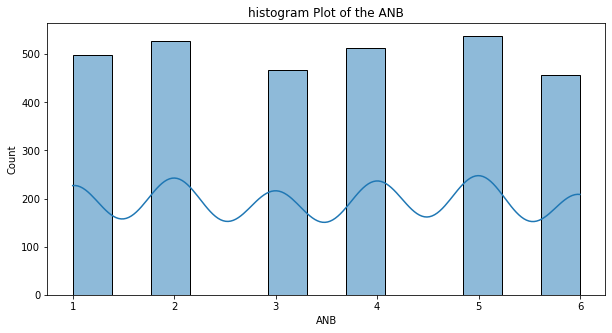

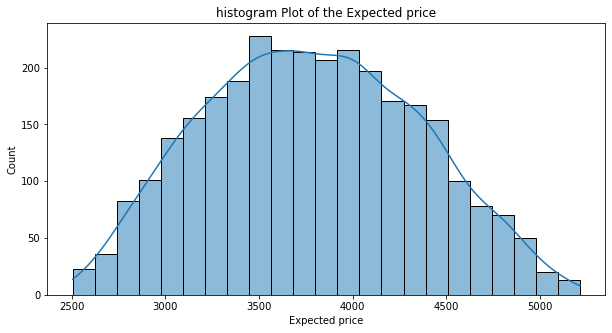

In [14]:
for j in cols:
    plt.figure(figsize=(10,5))
    sb.histplot(x=df1[j],kde=True)
    plt.title(f'histogram Plot of the {j}')
    plt.show()

In [15]:
v1 = df1['roof'].value_counts()
v1

YES    1543
NO     1457
Name: roof, dtype: int64

In [16]:
label1 = v1.index

In [17]:
v2 = df1['Grade'].value_counts()
v2

D    1270
C     716
B     539
A     399
E      76
Name: Grade, dtype: int64

In [18]:
label2 = v2.index

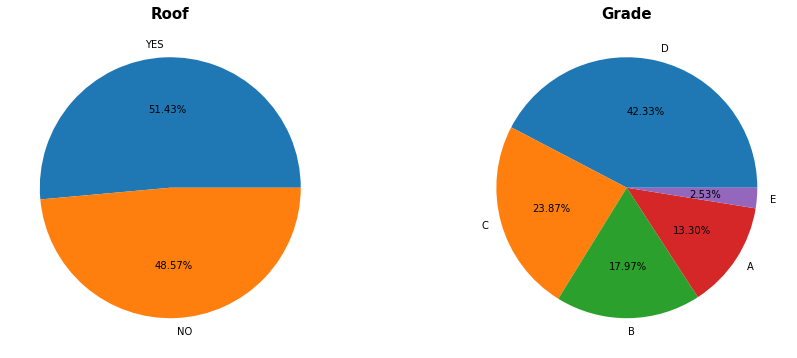

In [19]:
#visualizations for roof and Grade

plt.subplots(1,2,figsize=(15,6))

plt.subplot(121)
plt.pie(v1, labels=label1, autopct = '%.2f%%')
plt.title('Roof', fontweight='bold', size = 15)

plt.subplot(122)
plt.pie(v2, labels=label2, autopct = '%.2f%%')
plt.title('Grade', fontweight='bold', size = 15)
plt.show()

## interpretation:-
    * The Houses with 'Roof' are more than the houses without roof that is 51.43% .
    * The Houses with 'Grade D' are more compared to other grades that is 42.33% 
    and least houses are with 'Grade E' thate is 2.53%.

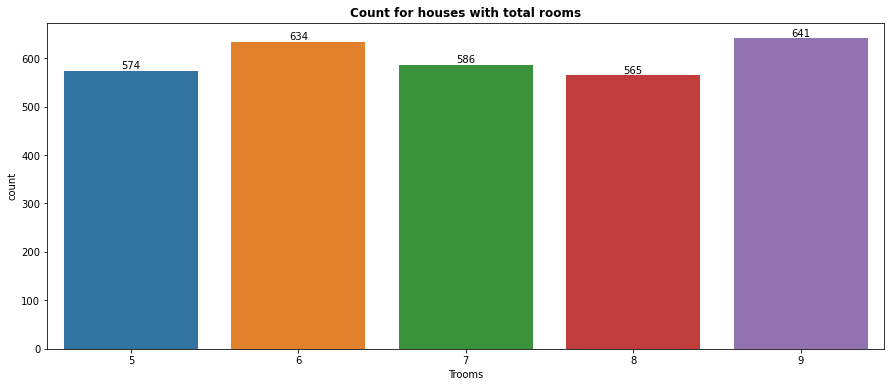

In [20]:
#count plot for total rooms in a house

plt.figure(figsize=(15,6))
ax = sb.countplot(data = df1, x='Trooms')
for container in ax.containers:
    ax.bar_label(container)
#plt.legend(loc='best')
plt.title('Count for houses with total rooms', fontweight = 'bold', size=12)
plt.show()


## interpretation:-
        * The houses with totalrooms = 9 are more that is 641 Houses followed by houses with total rooms = 6 that is 634
        and least houses with total rooms = 8 that is 565.

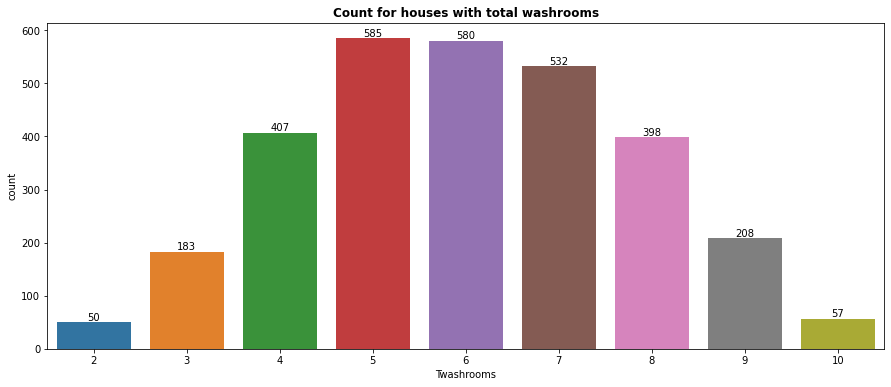

In [21]:
#count plot for total washrooms in a house

plt.figure(figsize=(15,6))
ax1 = sb.countplot(data = df1, x='Twashrooms')
for container in ax1.containers:
    ax1.bar_label(container)
#plt.legend(loc='best')
plt.title('Count for houses with total washrooms', fontweight = 'bold', size=12)
plt.show()


## Interpretation:
    * The houses with total washrooms = 5 are more that is about 585 houses followed by 
    total washrooms = 6 that is about 580 houses and houses with least total washrooms =2 that is about 50 houses.

In [22]:
#finding minimum for totalarea
df1['Area(total)'].min()

290

In [23]:
#finding maximum for totalarea
df1['Area(total)'].max()

360

In [24]:
df1['Area(total)'].describe()

count    3000.000000
mean      325.117000
std        20.507742
min       290.000000
25%       308.000000
50%       325.000000
75%       343.000000
max       360.000000
Name: Area(total), dtype: float64

In [25]:
lf = 308 - 1.5*(343-308)
uf = 343 + 1.5*(343-308)
print('LF:',lf)
print('UF:',uf)

LF: 255.5
UF: 395.5


In [26]:
o = df1[df1['Area(total)'] > uf]['Area(total)'].count()
print(f'From the IQR technique we found upper fence as {uf} and there are {o} outliers')

From the IQR technique we found upper fence as 395.5 and there are 0 outliers


     * There are no outliers in the feature 'Area(total).'

In [27]:
#creating bins for totalarea
b1 = [290,300,310,320,330,340,350,360]

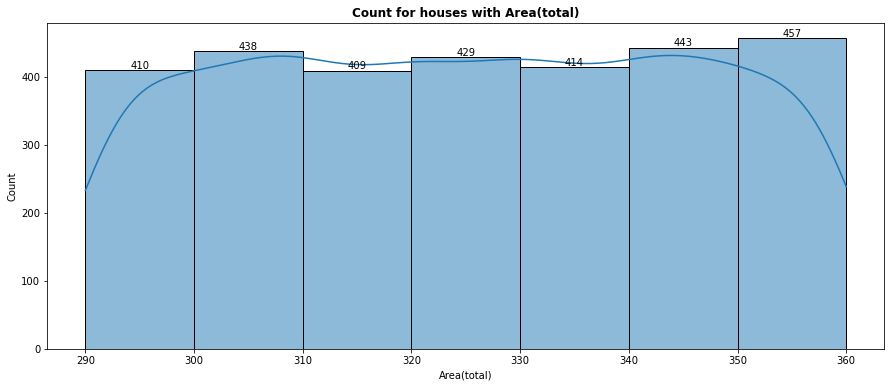

In [28]:
#count plot for total washrooms in a house

plt.figure(figsize=(15,6))
ax1 = sb.histplot(data = df1, x='Area(total)', bins=b1,kde=True)
for container in ax1.containers:
    ax1.bar_label(container)
#plt.legend(loc='best')
plt.title('Count for houses with Area(total)', fontweight = 'bold', size=12)
plt.show()


In [29]:
q = df1['Area(total)'].quantile(0.9)
m = df1['Area(total)'].mean()

print(f'90% of the data lies before {q}\n')
print(f'Mean of the data lies at {m}\n')

90% of the data lies before 354.0

Mean of the data lies at 325.117



## Interpretation:-
     * The 90% of the houses totalarea lies between the range of 290-354sqmts.
     * From the plot we can see the data is not normally distributed.

In [30]:
#finding minimum for Expected price
df1['Expected price'].min()

2504

In [31]:
#finding maximum for Expected price
df1['Expected price'].max()

5216

In [32]:
df1['Expected price'].describe()

count    3000.000000
mean     3782.938333
std       567.189995
min      2504.000000
25%      3354.000000
50%      3771.000000
75%      4208.000000
max      5216.000000
Name: Expected price, dtype: float64

In [33]:
lf1 = 3354 - 1.5*(4208-3354)
uf1 = 4208 + 1.5*(4208-3354)
print('LF:',lf1)
print('UF:',uf1)

LF: 2073.0
UF: 5489.0


In [34]:
o1 = df1[df1['Expected price'] > uf1]['Expected price'].count()
print(f'From the IQR technique we found upper fence as {uf1} and there are {o1} outliers')

From the IQR technique we found upper fence as 5489.0 and there are 0 outliers


      * No outliers in the feature 'Expected price'

In [35]:
#creating bins for totalarea
b2 = [2500,3000,3500,4000,4500,5000,5216]

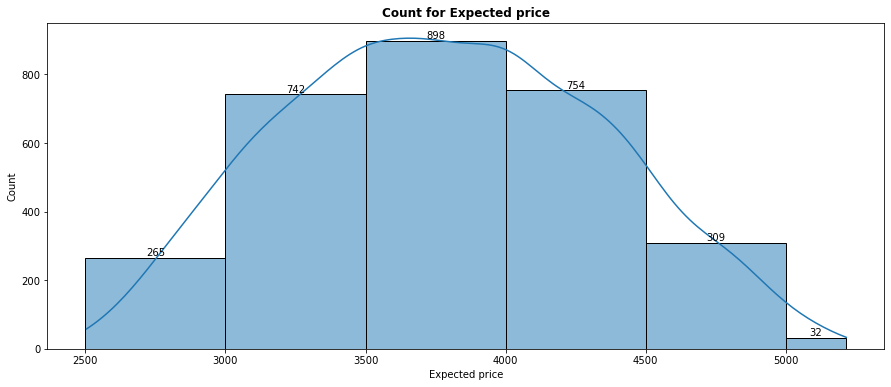

In [36]:
#count plot for total washrooms in a house

plt.figure(figsize=(15,6))
ax2 = sb.histplot(data = df1, x='Expected price', bins=b2,kde=True)
for container in ax2.containers:
    ax2.bar_label(container)
#plt.legend(loc='best')
plt.title('Count for Expected price', fontweight = 'bold', size=12)
plt.show()


In [37]:
q = df1['Expected price'].quantile(0.9)
m = df1['Expected price'].mean()

print(f'90% of the data lies before {q}\n')
print(f'Mean of the data lies at {m}\n')

90% of the data lies before 4537.2

Mean of the data lies at 3782.9383333333335



## Interpretation:-
       * The given data for 'Expected price' is normally distributed and 90% of the 'Expected price' lies 
       between the range 2500-4537.2.
       * From the plot we can say the 'Expected Price' is normally distributed.

In [38]:
df1['API'].min()

40

In [39]:
df1['API'].max()

100

In [40]:
df1['API'].describe()

count    3000.000000
mean       70.190667
std        17.563460
min        40.000000
25%        55.000000
50%        70.000000
75%        85.000000
max       100.000000
Name: API, dtype: float64

In [41]:
lf2 = 55 - 1.5*(85-55)
uf2 = 85 + 1.5*(85-55)
print('LF:',lf2)
print('UF:',uf2)

LF: 10.0
UF: 130.0


In [42]:
o2 = df1[df1['API'] > uf2]['API'].count()
print(f'From the IQR technique we found upper fence as {uf2} and there are {o2} outliers')

From the IQR technique we found upper fence as 130.0 and there are 0 outliers


       * No outliers in the feature 'API'(air pollution index)

In [43]:
#creating bins for totalarea
b3 = [40,50,60,70,80,90,100]

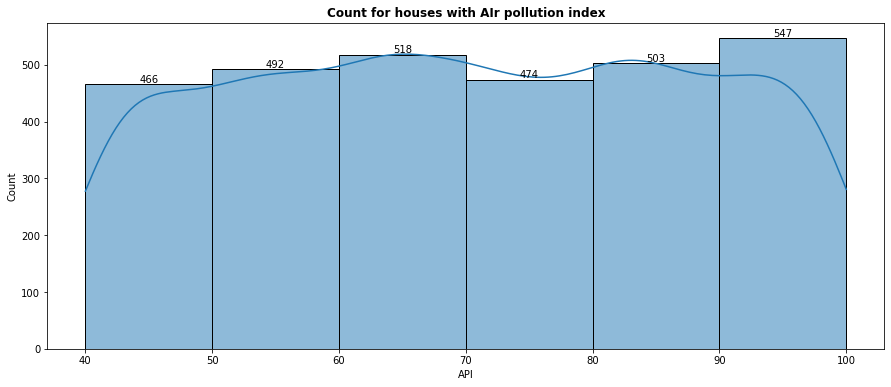

In [44]:
#count plot for API (air pollution index)

plt.figure(figsize=(15,6))
ax3 = sb.histplot(data = df1, x='API', bins=b3,kde=True)
for container in ax3.containers:
    ax3.bar_label(container)
#plt.legend(loc='best')
plt.title('Count for houses with AIr pollution index', fontweight = 'bold', size=12)
plt.show()


In [45]:
q2 = df1['API'].quantile(0.9)
m2 = df1['API'].mean()

print(f'90% of the data lies before {q2}\n')
print(f'Mean of the data lies at {m2}\n')

90% of the data lies before 95.0

Mean of the data lies at 70.19066666666667



## Interpretation:-
     * 90% of the data lies before API of 95.0 and the mean of API is 70.190.
     * There are more no. of houses with API between 90-100.
     * From the plot we can say that the data is not normally distributed.

# Bivariate analysis

### 1.Analysis of roof with Grade

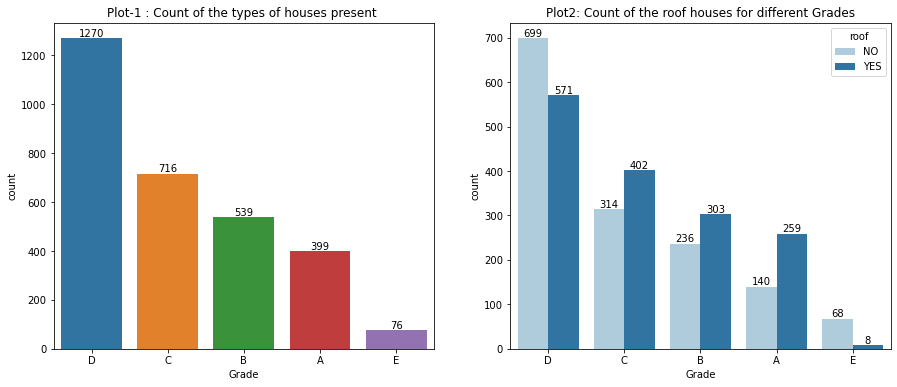

In [46]:
fig,axes = plt.subplots(1,2,figsize=(15,6))

ax1 = sb.countplot(x='Grade',data=df1,ax=axes[0])
for container in ax1.containers:
    ax1.bar_label(container)
axes[0].set_title('Plot-1 : Count of the types of houses present ')

ax2 = sb.countplot(x='Grade',data=df1,hue='roof',palette='Paired')
for container in ax2.containers:
    ax2.bar_label(container)
axes[1].set_title('Plot2: Count of the roof houses for different Grades')

plt.show()

## Interpretation:-
     * There are more number of houses with Grade-D in which Houses without roof are more compared to houses with roof.
     * The houses with Grades like C,B and A have more houses with roof compared to houses without roof.
     * There are least houses in Grade E.

## 2. Analysis of Trooms with Grade

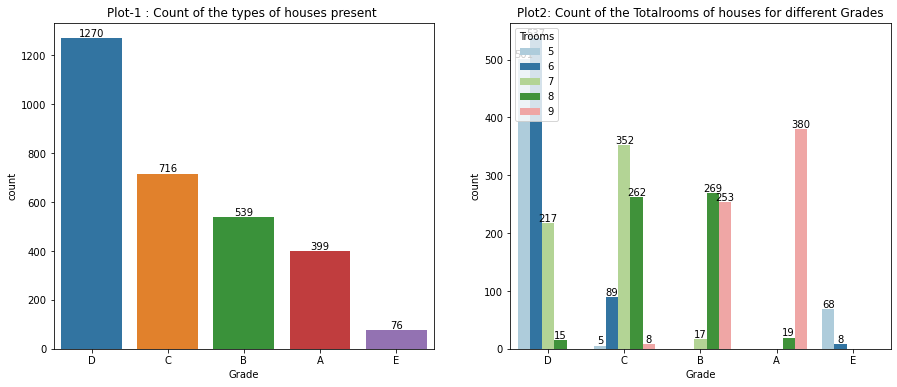

In [47]:
fig,axes = plt.subplots(1,2,figsize=(15,6))

ax1 = sb.countplot(x='Grade',data=df1,ax=axes[0])
for container in ax1.containers:
    ax1.bar_label(container)
axes[0].set_title('Plot-1 : Count of the types of houses present ')

ax2 = sb.countplot(x='Grade',data=df1,hue='Trooms',palette='Paired')
for container in ax2.containers:
    ax2.bar_label(container)

axes[1].set_title('Plot2: Count of the Totalrooms of houses for different Grades')


plt.show()

## Interpretation:-
     * There are more number of houses with Grade-D in which Houses with totalrooms of 6 are more followed by 5 rooms.

## 3. Analysis of Twashrooms with Grade

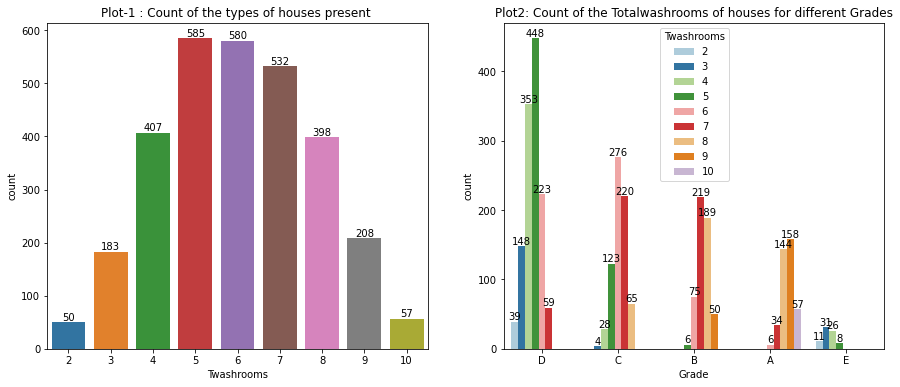

In [48]:
fig,axes = plt.subplots(1,2,figsize=(15,6))

ax1 = sb.countplot(x='Twashrooms',data=df1,ax=axes[0])
for container in ax1.containers:
    ax1.bar_label(container)
axes[0].set_title('Plot-1 : Count of the types of houses present ')

ax2 = sb.countplot(x='Grade',data=df1,hue='Twashrooms',palette='Paired')
for container in ax2.containers:
    ax2.bar_label(container)

axes[1].set_title('Plot2: Count of the Totalwashrooms of houses for different Grades')


plt.show()

## Interpretation:-
    * There are more number of houses with Grade-D in which Houses with totalwashrooms of 5 are more followed by 
    4 washrooms.

## 4.Analysis of Expected price with Grade

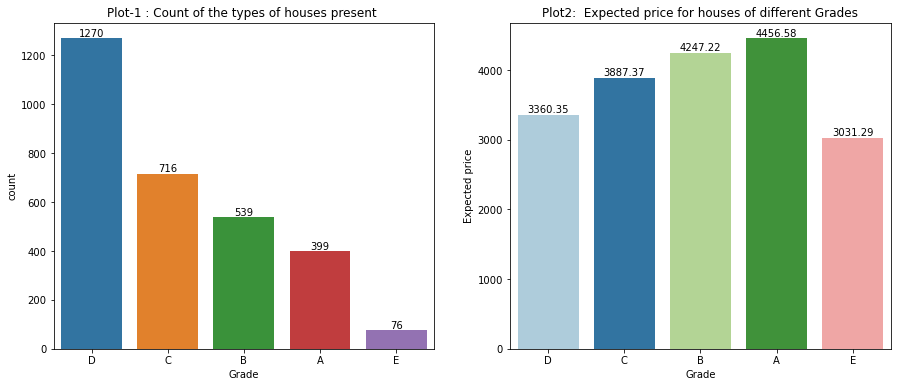

In [49]:
fig,axes = plt.subplots(1,2,figsize=(15,6))

ax1 = sb.countplot(x='Grade',data=df1,ax=axes[0])
for container in ax1.containers:
    ax1.bar_label(container)
axes[0].set_title('Plot-1 : Count of the types of houses present ')

ax2 = sb.barplot(x=df1['Grade'],y=df1['Expected price'],palette='Paired',ci=None)
for container in ax2.containers:
    ax2.bar_label(container)

axes[1].set_title('Plot2:  Expected price for houses of different Grades')


plt.show()

## Interpretation:-
       * The Expected prices for the houses with Grade-A are more although the houses with Grade-A are second least.
       * The count of houses with Grade-D are more but the Expected price is second least.

## 5.Analysis of Nbedrooms with Expected price

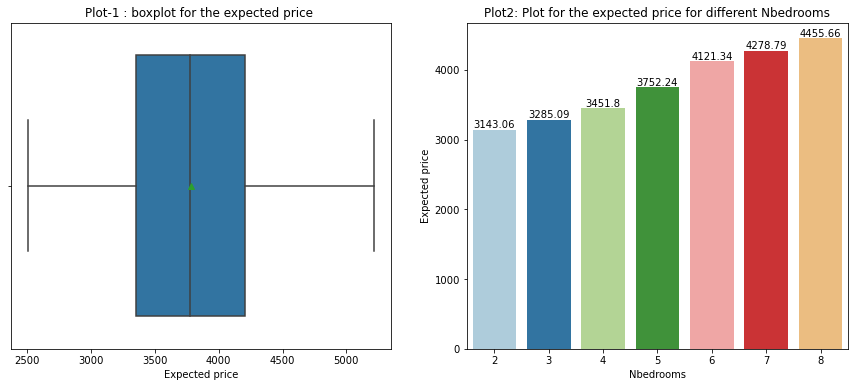

In [50]:
fig,axes = plt.subplots(1,2,figsize=(15,6))

ax1 = sb.boxplot(x='Expected price',data=df1,ax=axes[0],showmeans=True)
for container in ax1.containers:
    ax1.bar_label(container)
axes[0].set_title('Plot-1 : boxplot for the expected price ')

ax2 = sb.barplot(y=df1['Expected price'],x=df1['Nbedrooms'],palette='Paired',ci=None)
for container in ax2.containers:
    ax2.bar_label(container)

axes[1].set_title('Plot2: Plot for the expected price for different Nbedrooms')


plt.show()

## Interpretation:-
     * From the plot we can say that the houses with more no. of bedrooms have the highest Expected price.
     * As the number of bedrooms increases the expected prices is also increasing.

## 6.Analysis of Lawn(area) with Grade

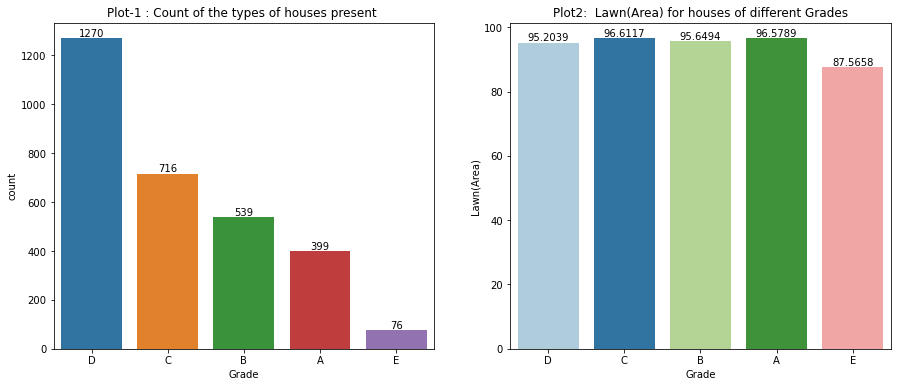

In [51]:
fig,axes = plt.subplots(1,2,figsize=(15,6))

ax1 = sb.countplot(x='Grade',data=df1,ax=axes[0])
for container in ax1.containers:
    ax1.bar_label(container)
axes[0].set_title('Plot-1 : Count of the types of houses present ')

ax2 = sb.barplot(x=df1['Grade'],y=df1['Lawn(Area)'],palette='Paired',ci=None)
for container in ax2.containers:
    ax2.bar_label(container)

axes[1].set_title('Plot2:  Lawn(Area) for houses of different Grades')


plt.show()

## Interpretation:-
         The Lawn(Area) for the houses with Grade C is more followed by Grade A houses and least for Grade D houses.

## 7. Analysis of Roof with expected price

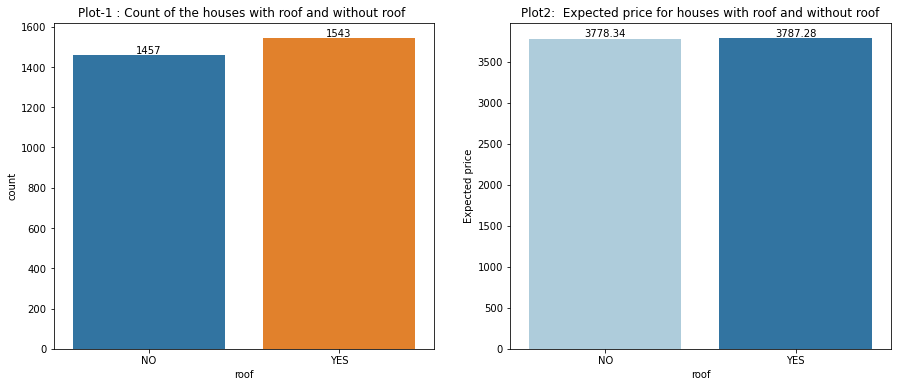

In [52]:
fig,axes = plt.subplots(1,2,figsize=(15,6))

ax1 = sb.countplot(x='roof',data=df1,ax=axes[0])
for container in ax1.containers:
    ax1.bar_label(container)
axes[0].set_title('Plot-1 : Count of the houses with roof and without roof ')

ax2 = sb.barplot(x=df1['roof'],y=df1['Expected price'],palette='Paired',ci=None)
for container in ax2.containers:
    ax2.bar_label(container)

axes[1].set_title('Plot2:  Expected price for houses with roof and without roof')


plt.show()

## Interpretation:-
         *There is not much difference in the Expected prices for the houses with roof and without roof.

## Multivariate Analysis

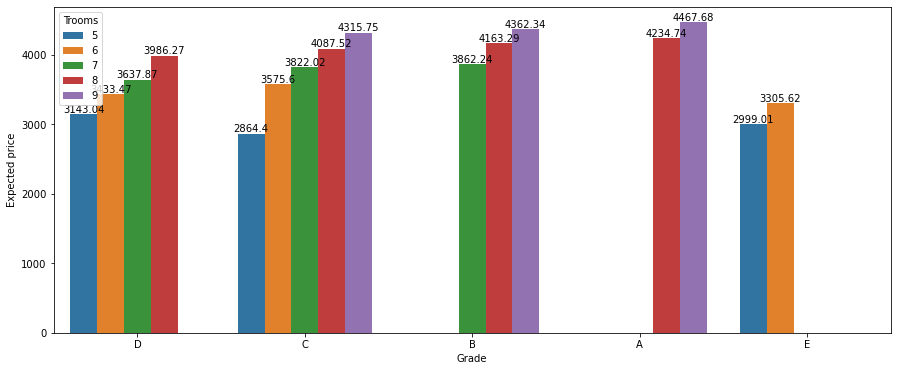

In [53]:
plt.figure(figsize=(15,6))
ax = sb.barplot(data=df1,y='Expected price',hue='Trooms',x='Grade',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Interpretation:-
      * As the total rooms in a house increases the expected price will also increase with respect to each category.

# Data Preprocessing

In [54]:
# converting the object columns to categorical
non_numeric_cols = ['roof','Grade']

for i in non_numeric_cols:
    df1[i] = df1[i].astype('category')

In [55]:
#converting the category columns to numeric
cat_cols = ['roof','Grade']
label_encoder = LabelEncoder()

for j in cat_cols:
    df1[j] = label_encoder.fit_transform(df1[j])

In [56]:
#Checking for info after converting the datatypes of columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Area(total)     3000 non-null   int64
 1   Trooms          3000 non-null   int64
 2   Nbedrooms       3000 non-null   int64
 3   Nbwashrooms     3000 non-null   int64
 4   Twashrooms      3000 non-null   int64
 5   roof            3000 non-null   int32
 6   Roof(Area)      3000 non-null   int64
 7   Lawn(Area)      3000 non-null   int64
 8   Nfloors         3000 non-null   int64
 9   API             3000 non-null   int64
 10  ANB             3000 non-null   int64
 11  Expected price  3000 non-null   int64
 12  Grade           3000 non-null   int32
dtypes: int32(2), int64(11)
memory usage: 281.4 KB


In [57]:
#Specifying the X and y
X = df1.drop(['Grade'],axis=1)
y = df1['Grade']

In [58]:
X.head(1)

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,339,6,5,4,6,0,0,76,2,79,6,3481


In [59]:
#Scaling the dependent columns using standardscaler
scaler = StandardScaler()

numerics = ['int16','int32','int64']
df1_new = X.select_dtypes(include=numerics)
df1_scaled = pd.DataFrame(scaler.fit_transform(df1_new.to_numpy()),columns=df1_new.columns)
df1_scaled.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.029090,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429
1,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.971733,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292
2,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,0.971733,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609
3,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,0.971733,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319
4,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.029090,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911


In [60]:
#concating the dependent and independent columns

df2 = pd.concat([df1_scaled,y],axis=1)
df2.head(1)

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.02909,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429,3


In [61]:
#finding the correlation
v = df2.corr()
v

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Area(total),1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623
API,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.007983,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575,-0.099000


In [62]:
v['Grade'].sort_values(ascending=False)

Grade             1.000000
ANB              -0.024025
Lawn(Area)       -0.051200
API              -0.099000
roof             -0.166635
Roof(Area)       -0.170259
Area(total)      -0.177332
Expected price   -0.760820
Nfloors          -0.787623
Twashrooms       -0.819280
Nbwashrooms      -0.847319
Nbedrooms        -0.865389
Trooms           -0.875145
Name: Grade, dtype: float64

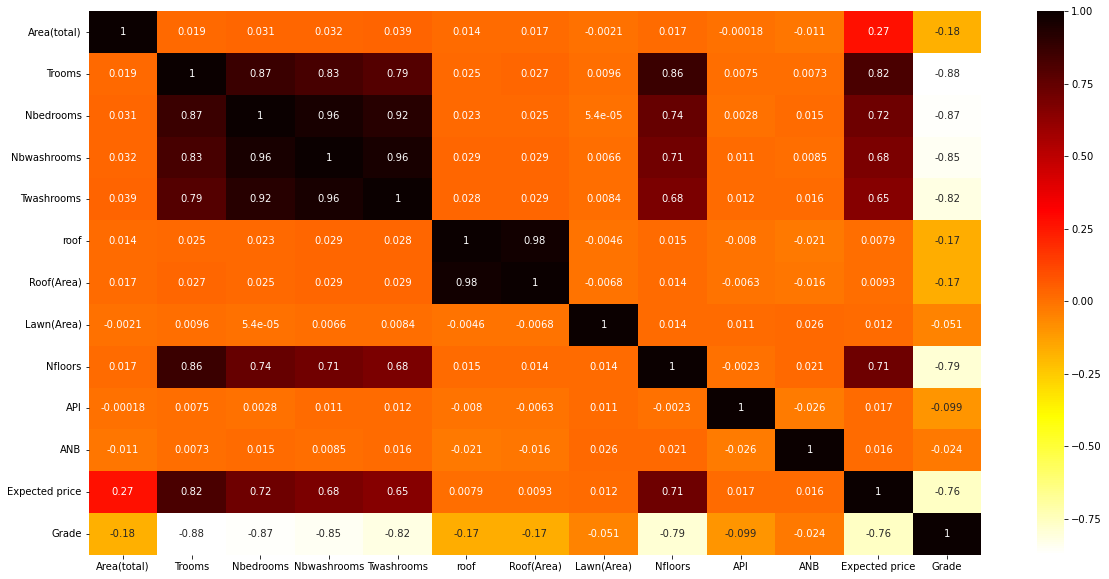

In [63]:
#Plotting the heatmap
plt.figure(figsize=(20,10))
sb.heatmap(v,annot=True,cmap='hot_r')
plt.show()

In [64]:
#feature selection
df2_1 = df2.drop(['ANB','Lawn(Area)','Nbedrooms','Nbwashrooms'],axis=1)
df2_1.head(1)

,Area(total),Trooms,Twashrooms,roof,Roof(Area),Nfloors,API,Expected price,Grade
0,0.677077,-0.718985,-0.005973,-1.02909,-1.004968,-1.241831,0.501655,-0.532429,3


## Interpretation:-
       * dropping the columns which are less correlated with dependent feature and features which are highly
       intercorrelated with each other.

In [65]:
# After feature selection specifying the variables X1 and y1

X1 = df2_1.loc[:, df2_1.columns != 'Grade']
y1 = df2_1['Grade']

In [66]:
# After feature selection specifying the variables X1 and y1

X2 = df2.loc[:, df2.columns != 'Grade']
y2 = df2['Grade']

# Model Building

## 1.GaussianNB

In [67]:
#importing required libraries for model building
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from numpy import mean,std

In [68]:
#Define the model
model1 = GaussianNB()

In [69]:
#evaluate the model
cv = RepeatedStratifiedKFold(n_splits=15,n_repeats=5,random_state = None)
g_accuracy = cross_val_score(model1,X1,y1,cv=cv,scoring='accuracy',n_jobs=-1,error_score='raise')
g_WPrecision = cross_val_score(model1,X1,y1,cv=cv,scoring='precision_weighted',n_jobs=-1,error_score='raise')
g_Wf1_score = cross_val_score(model1,X1,y1,cv=cv,scoring='f1_weighted',n_jobs=-1,error_score='raise')
g_WRecall = cross_val_score(model1,X1,y1,cv=cv,scoring='recall_weighted',n_jobs=-1,error_score='raise')

In [70]:
print('accuracy score of model={}'.format(round(g_accuracy.mean(),2)*100),'%')
print('weighted precision score of model={}'.format(round(g_WPrecision.mean(),2)*100),'%')
print('weighted f1  score of model={}'.format(round(g_Wf1_score.mean(),2)*100),'%')
print('weighted recall score of model={}'.format(round(g_WRecall.mean(),2)*100),'%')

accuracy score of model=78.0 %
weighted precision score of model=79.0 %
weighted f1  score of model=78.0 %
weighted recall score of model=78.0 %


## 2.KNearestNeighbors

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
model2 = KNeighborsClassifier()

In [73]:
#evaluate the model
cv = RepeatedStratifiedKFold(n_splits=15,n_repeats=5,random_state = None)
knn_accuracy = cross_val_score(model2,X1,y1,cv=cv,scoring='accuracy',n_jobs=-1,error_score='raise')
knn_WPrecision = cross_val_score(model2,X1,y1,cv=cv,scoring='precision_weighted',n_jobs=-1,error_score='raise')
knn_Wf1_score = cross_val_score(model2,X1,y1,cv=cv,scoring='f1_weighted',n_jobs=-1,error_score='raise')
knn_WRecall = cross_val_score(model2,X1,y1,cv=cv,scoring='recall_weighted',n_jobs=-1,error_score='raise')

In [74]:
print('accuracy score of model={}'.format(round(knn_accuracy.mean(),2)*100),'%')
print('weighted precision score of model={}'.format(round(knn_WPrecision.mean(),2)*100),'%')
print('weighted f1  score of model={}'.format(round(knn_Wf1_score.mean(),2)*100),'%')
print('weighted recall score of model={}'.format(round(knn_WRecall.mean(),2)*100),'%')

accuracy score of model=86.0 %
weighted precision score of model=86.0 %
weighted f1  score of model=86.0 %
weighted recall score of model=86.0 %


## 3.DecisionTree Classifier

In [75]:
# Define model
model3 = DecisionTreeClassifier(max_depth=10,min_samples_split=12,max_leaf_nodes=24)

In [76]:
#evaluate the model
cv = RepeatedStratifiedKFold(n_splits=15,n_repeats=5,random_state = None)
dtc_accuracy = cross_val_score(model3,X2,y2,cv=cv,scoring='accuracy',n_jobs=-1,error_score='raise')
dtc_WPrecision = cross_val_score(model3,X2,y2,cv=cv,scoring='precision_weighted',n_jobs=-1,error_score='raise')
dtc_Wf1_score = cross_val_score(model3,X2,y2,cv=cv,scoring='f1_weighted',n_jobs=-1,error_score='raise')
dtc_WRecall = cross_val_score(model3,X2,y2,cv=cv,scoring='recall_weighted',n_jobs=-1,error_score='raise')

In [77]:
print('accuracy score of model={}'.format(round(dtc_accuracy.mean(),2)*100),'%')
print('weighted precision score of model={}'.format(round(dtc_WPrecision.mean(),2)*100),'%')
print('weighted f1  score of model={}'.format(round(dtc_Wf1_score.mean(),2)*100),'%')
print('weighted recall score of model={}'.format(round(dtc_WRecall.mean(),2)*100),'%')

accuracy score of model=83.0 %
weighted precision score of model=81.0 %
weighted f1  score of model=82.0 %
weighted recall score of model=83.0 %


## 4.RandomForestClassifier

In [78]:
# Define model
model4 = RandomForestClassifier(max_depth=10,min_samples_split=12,max_leaf_nodes=24)

In [79]:
#evaluate the model
cv = RepeatedStratifiedKFold(n_splits=15,n_repeats=5,random_state = None)
rfc_accuracy = cross_val_score(model4,X2,y2,cv=cv,scoring='accuracy',n_jobs=-1,error_score='raise')
rfc_WPrecision = cross_val_score(model4,X2,y2,cv=cv,scoring='precision_weighted',n_jobs=-1,error_score='raise')
rfc_Wf1_score = cross_val_score(model4,X2,y2,cv=cv,scoring='f1_weighted',n_jobs=-1,error_score='raise')
rfc_WRecall = cross_val_score(model4,X2,y2,cv=cv,scoring='recall_weighted',n_jobs=-1,error_score='raise')

In [80]:
print('accuracy score of model={}'.format(round(rfc_accuracy.mean(),2)*100),'%')
print('weighted precision score of model={}'.format(round(rfc_WPrecision.mean(),2)*100),'%')
print('weighted f1  score of model={}'.format(round(rfc_Wf1_score.mean(),2)*100),'%')
print('weighted recall score of model={}'.format(round(rfc_WRecall.mean(),2)*100),'%')

accuracy score of model=85.0 %
weighted precision score of model=82.0 %
weighted f1  score of model=83.0 %
weighted recall score of model=84.0 %


## 5.XGB Classifier

In [81]:
from xgboost import XGBClassifier

In [82]:
#fit the model on training data
model5 = XGBClassifier(n_estimators=25,max_depth=3,ets=0.1,subsample=0.7,colsample_bytree=0.8)

In [83]:
#evaluate the model
cv = RepeatedStratifiedKFold(n_splits=15,n_repeats=5,random_state = None)
xgb_accuracy = cross_val_score(model5,X2,y2,cv=cv,scoring='accuracy',n_jobs=-1,error_score='raise')
xgb_WPrecision = cross_val_score(model5,X2,y2,cv=cv,scoring='precision_weighted',n_jobs=-1,error_score='raise')
xgb_Wf1_score = cross_val_score(model5,X2,y2,cv=cv,scoring='f1_weighted',n_jobs=-1,error_score='raise')
xgb_WRecall = cross_val_score(model5,X2,y2,cv=cv,scoring='recall_weighted',n_jobs=-1,error_score='raise')

In [84]:
print('accuracy score of model={}'.format(round(xgb_accuracy.mean(),2)*100),'%')
print('weighted precision score of model={}'.format(round(xgb_WPrecision.mean(),2)*100),'%')
print('weighted f1  score of model={}'.format(round(xgb_Wf1_score.mean(),2)*100),'%')
print('weighted recall score of model={}'.format(round(xgb_WRecall.mean(),2)*100),'%')

accuracy score of model=89.0 %
weighted precision score of model=90.0 %
weighted f1  score of model=89.0 %
weighted recall score of model=89.0 %


In [85]:
v1=pd.DataFrame({'models':['GaussianNB','KNN','DecisionTree','RandomForest','XGB Classifier'],
                 'accuracy':[78,86,83,84,89],
                 'W_precision':[79,86,82,83,90],
                 'W_f1':[78,86,82,83,89],
                 'W_recall':[78,86,83,85,89]})
v1

,models,accuracy,W_precision,W_f1,W_recall
0,GaussianNB,78,79,78,78
1,KNN,86,86,86,86
2,DecisionTree,83,82,82,83
3,RandomForest,84,83,83,85
4,XGB Classifier,89,90,89,89


In [86]:
v1['W_f1'].max()

89

## Interpretation:-
    * Highest weighted f1_Score on the current dataset is obtained by XGB Classifier (89%) followed by
    KNN Classifiers(86%) and Stacking Classifier(83%) 
    * So fitting the entire data to XGB classifier.

## KNN classifier

In [87]:
#Splitting the data using hold out method

X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.3,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2100, 12), (900, 12), (2100,), (900,))

In [88]:
#fitting the train data
eval_set = [(X_test,y_test)]
model5.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='mlogloss', eval_set=eval_set, verbose=True)

[23:06:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "ets" } are not used.

[0]	validation_0-mlogloss:1.22077
[1]	validation_0-mlogloss:1.00528
[2]	validation_0-mlogloss:0.85831
[3]	validation_0-mlogloss:0.74707
[4]	validation_0-mlogloss:0.66686
[5]	validation_0-mlogloss:0.60948
[6]	validation_0-mlogloss:0.56702
[7]	validation_0-mlogloss:0.53011
[8]	validation_0-mlogloss:0.50138
[9]	validation_0-mlogloss:0.47355
[10]	validation_0-mlogloss:0.44491
[11]	validation_0-mlogloss:0.42289
[12]	validation_0-mlogloss:0.40080
[13]	validation_0-mlogloss:0.38700
[14]	validation_0-mlogloss:0.37262
[15]	validation_0-mlogloss:0.35933
[16]	validation_0-mlogloss:0.34811
[17]	validation_0-mlogloss:0.33706
[18]	validation_0-mlogloss:0.32916
[19]	validation_0-mlogloss:0.31598
[20]	validation_0-mlogloss:0.30859
[21]	validation_0-mlogloss:0.30155
[22]	validation_0-mlogloss:0.29537
[23]	validat

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False, ets=0.1,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=25, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', ...)

In [89]:
#Finding accuracy for train data
print('Accuracy :',round(model5.score(X_train,y_train)*100,2),'%')

Accuracy : 94.19 %


In [90]:
#Finding accuracy for test data
print('Accuracy :',round(model5.score(X_test,y_test)*100,2),'%')

Accuracy : 90.56 %


In [91]:
#predicting the model for test data
y_predict = model5.predict(X_test)
y_predict

array([2, 2, 3, 2, 0, 1, 1, 0, 1, 3, 3, 3, 3, 0, 0, 0, 3, 2, 3, 3, 3, 3,
       2, 0, 2, 1, 2, 3, 2, 0, 3, 1, 0, 0, 2, 3, 2, 1, 3, 2, 3, 2, 1, 3,
       3, 1, 2, 1, 1, 1, 0, 3, 3, 1, 1, 2, 3, 1, 3, 2, 3, 0, 2, 3, 3, 2,
       1, 3, 1, 3, 3, 2, 1, 3, 0, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 1, 3, 1, 3, 2, 2, 4, 3, 0, 0, 3, 0, 2, 1, 3, 3, 3, 3, 3, 3,
       0, 1, 3, 1, 2, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 1, 3, 2, 2, 3, 2, 3,
       2, 3, 1, 2, 3, 2, 3, 0, 0, 0, 3, 3, 2, 1, 2, 3, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 3, 3, 1, 3, 2, 2, 1, 3, 0, 3, 2, 3, 3, 3, 3, 1, 3, 0, 1,
       0, 1, 2, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 1,
       1, 1, 2, 0, 1, 3, 3, 2, 3, 0, 2, 3, 3, 1, 2, 3, 3, 0, 1, 3, 1, 1,
       3, 3, 2, 3, 3, 3, 3, 2, 1, 3, 3, 2, 2, 3, 1, 4, 3, 3, 3, 2, 2, 3,
       3, 2, 3, 2, 3, 2, 2, 2, 3, 0, 3, 3, 2, 3, 2, 3, 0, 3, 0, 3, 1, 1,
       3, 3, 0, 2, 2, 0, 2, 1, 2, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 4, 2, 3,
       0, 0, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 0,

In [92]:
accuracy = accuracy_score(y_test,y_predict)
precision = precision_score(y_test,y_predict,average='weighted')
recall = recall_score(y_test,y_predict,average='weighted')
f1 = f1_score(y_test,y_predict,average='weighted')

In [93]:
print('accuracy score of model={}'.format(round(accuracy,2)*100),'%')
print('weighted precision score of model={}'.format(round(precision,2)*100),'%')
print('weighted f1  score of model={}'.format(round(f1,2)*100),'%')
print('weighted recall score of model={}'.format(round(recall,2)*100),'%')

accuracy score of model=91.0 %
weighted precision score of model=91.0 %
weighted f1  score of model=90.0 %
weighted recall score of model=91.0 %


## Interpretation:-
       * The accuracy_score of the train data is 94.19%.
       * The accuracy_score of the test data is 90.56%.
       * For both the train and test data the performance is nearly same and the model performance we can say is 'good'.

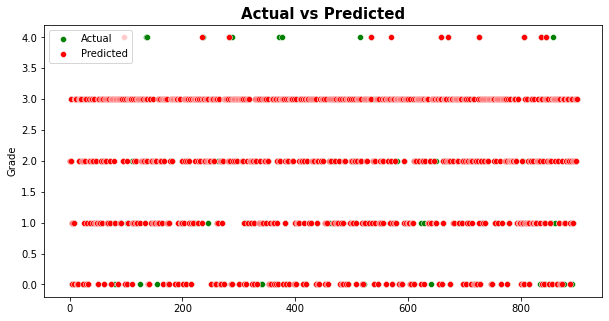

In [94]:
#plotting the graph for actual vs predicted values
x=np.arange(0,len(y_test))
plt.figure(figsize=(10,5))

sb.scatterplot(x,y_test,color='green',label='Actual')
sb.scatterplot(x,y_predict,color='red',label='Predicted')
plt.legend(loc='best')
plt.title('Actual vs Predicted',fontweight='bold',size=15)
plt.show()

## Interpretation:-
       * The actual values and predicted values difference is very less.

## checking for most important feature in XGBOOST

In [95]:
from xgboost import plot_importance

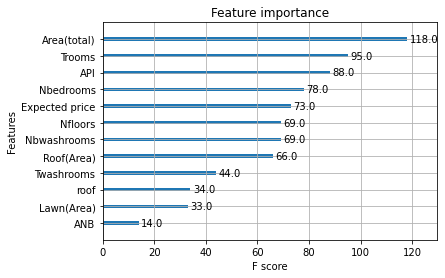

In [96]:
plot_importance(model5)
plt.show()

       * The best feature for the XGBOOST classifier model is 'Area(total)' followed by 'Trooms' and 'API'.